In [2]:
import numpy as np
import hmm_sampling as hmms
from matplotlib import pyplot as plt
from IPython.display import YouTubeVideo
%matplotlib inline

## How to infer the transition probabilities for an HMM and the effects of sampling

Efect of sampling in a Markov model:

This is a complement on some discussion about the follow lecture https://youtu.be/34Noy-7bPAo por of the Artificial Intelligence Nano degree from Udacity

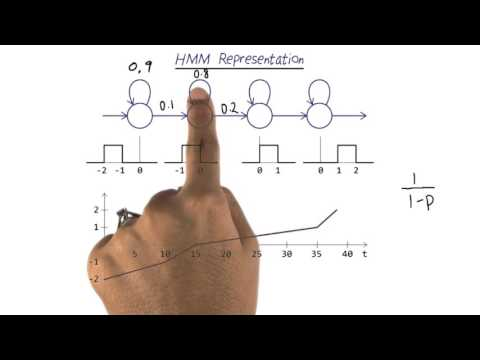

In [3]:
YouTubeVideo('34Noy-7bPAo')

![](hmm_representation.png)

Given the above diagram one questions arises:
### How did we get the 0.1, 0.2, 0.05 transition probabilities?
The first approach might be that transitions probability should be inversely proportional to the amount of time in a corresponding state. So $0.1 = \frac{1}{10}$, $0.2 = \frac{1}{5}$ and $0.05 = \frac{1}{20}$.
That seems ok, but another question might arise:
### What is the units were miliseconds, or microseconds, or just some units were 2 seconds correspond to a time unit? How would the model would change? 
Applying the same rules for miliseconds, the results will be: 1e-04, 2e-04,5e-05 respectevely. You can do the math for all the other cases by just doing:

$\frac{1}{N_t}$ where $N_t$ is just the number of time units in the given state

### What does this means?
This can be viewed as how many times I will sample a specific state. For example, for seconds in the first state, I will sample it 10 times on average, for the second 5 and the third 20. For miliseconds, I will do it 10000, 5000 and 20000 on avarage respectevely

### In the following notebook you can see how the probabilities of each state evolve with time given different sampling rates
The 4th state has self transition probability 1. So after long time we will end there.

In [2]:
runing_seconds = 40

Transition vector: [ 0.1   0.2   0.05  0.  ]
Transition matrix:
[[ 0.9   0.1   0.    0.  ]
 [ 0.    0.8   0.2   0.  ]
 [ 0.    0.    0.95  0.05]
 [ 0.    0.    0.    1.  ]]
States probabilities after sampling: [ 0.01478088  0.01464796  0.28375278  0.68681837]


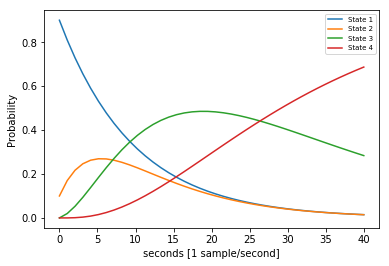

In [3]:
samples_per_second = 1
states_1 = hmms.get_state_probabilities(samples_per_second, runing_seconds)
x_1 = np.linspace(0,runing_seconds, len(states_1[0]))
curves = plt.plot(x_1, np.array(states_1).T)
plt.legend(curves, ('State 1','State 2','State 3','State 4'), fontsize = 'x-small', loc = 'best')
plt.xlabel('seconds [1 sample/second]')
plt.ylabel('Probability')
plt.show()

Transition vector: [ 0.4  0.8  0.2  0. ]
Transition matrix:
[[ 0.6  0.4  0.   0. ]
 [ 0.   0.2  0.8  0. ]
 [ 0.   0.   0.8  0.2]
 [ 0.   0.   0.   1. ]]
States probabilities after sampling: [ 0.00604662  0.00604652  0.26214482  0.72576205]


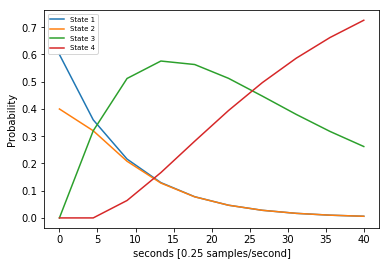

In [4]:
samples_per_second = 0.25
states_025 = hmms.get_state_probabilities(samples_per_second, runing_seconds)
x_025 = np.linspace(0,runing_seconds, len(states_025[0]))
curves = plt.plot(x_025, np.array(states_025).T)
plt.legend(curves, ('State 1','State 2','State 3','State 4'), fontsize = 'x-small', loc = 'best')
plt.xlabel('seconds [0.25 samples/second]')
plt.ylabel('Probability')
plt.show()

**Downsampling**: Really low sampling rate. Only 4 samples in 10 seconds (for first state). 

Transition vector: [ 0.2  0.4  0.1  0. ]
Transition matrix:
[[ 0.8  0.2  0.   0. ]
 [ 0.   0.6  0.4  0. ]
 [ 0.   0.   0.9  0.1]
 [ 0.   0.   0.   1. ]]
States probabilities after sampling: [ 0.01152922  0.01149265  0.2781363   0.69884183]


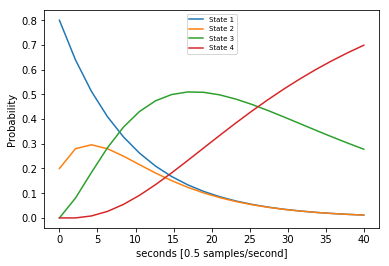

In [5]:
samples_per_second = 0.5
states_05 = hmms.get_state_probabilities(samples_per_second, runing_seconds)
x_05 = np.linspace(0,runing_seconds, len(states_05[0]))
curves = plt.plot(x_05, np.array(states_05).T)
plt.legend(curves, ('State 1','State 2','State 3','State 4'), fontsize = 'x-small', loc = 'best')
plt.xlabel('seconds [0.5 samples/second]')
plt.ylabel('Probability')
plt.show()

Transition vector: [  1.00000000e-04   2.00000000e-04   5.00000000e-05   0.00000000e+00]
Transition matrix:
[[  9.99900000e-01   1.00000000e-04   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   9.99800000e-01   2.00000000e-04   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   9.99950000e-01   5.00000000e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
States probabilities after sampling: [ 0.01831198  0.01797678  0.28807507  0.67563618]


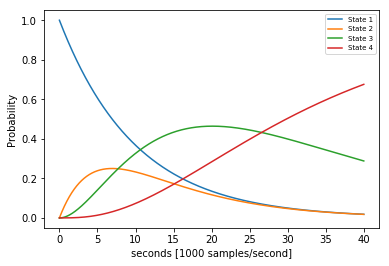

In [6]:
samples_per_second = 1000
states_1000 = hmms.get_state_probabilities(samples_per_second, runing_seconds)
x_1000 = np.linspace(0,runing_seconds, len(states_1000[0]))
curves = plt.plot(x_1000, np.array(states_1000).T)
plt.legend(curves, ('State 1','State 2','State 3','State 4'), fontsize = 'x-small', loc = 'best')
plt.xlabel('seconds [1000 samples/second]')
plt.ylabel('Probability')
plt.show()

**upsampling**: Here we have 1000 samples per seconds so we have high resolution

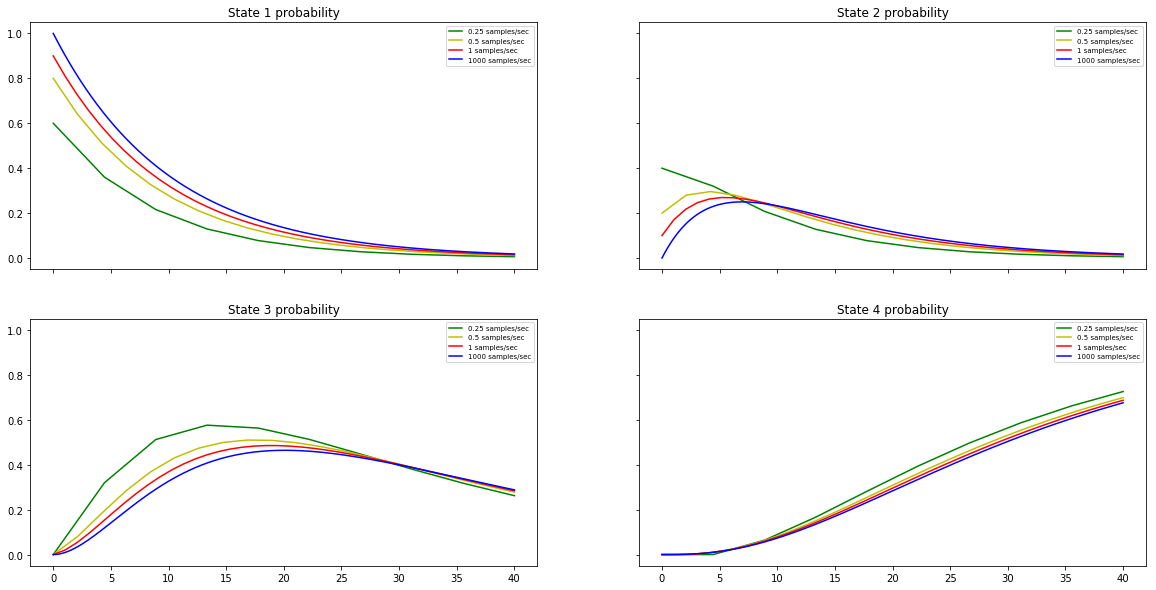

In [8]:
f, ax = plt.subplots(2, 2, sharey=True, sharex=True, figsize = (20,10))
ax = ax.flatten()
titles = ['State 1 probability', 'State 2 probability', 'State 3 probability', 'State 4 probability']
for i in range(4):
    ax[i].set_title(titles[i])
    ax[i].plot(x_025, states_025[i],color='g', label = '0.25 samples/sec')
    ax[i].plot(x_05, states_05[i],color='y', label = '0.5 samples/sec')
    ax[i].plot(x_1, states_1[i],color='r', label = '1 samples/sec')
    ax[i].plot(x_1000, states_1000[i],color='b', label = '1000 samples/sec')
    ax[i].legend(fontsize = 'x-small')
plt.show()

### Runing for long time (All states probabilities but 4th go to zero. 4th goes to 1)

Transition vector: [  1.00000000e-04   2.00000000e-04   5.00000000e-05   0.00000000e+00]
Transition matrix:
[[  9.99900000e-01   1.00000000e-04   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   9.99800000e-01   2.00000000e-04   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   9.99950000e-01   5.00000000e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
States probabilities after sampling: [  4.53772340e-05   4.53751769e-05   1.77841066e-02   9.82125141e-01]


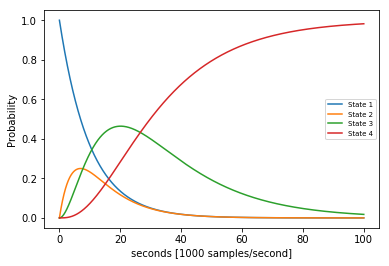

In [12]:
runing_seconds = 100
samples_per_second = 1000
states_1000 = hmms.get_state_probabilities(samples_per_second, runing_seconds)
x_1000 = np.linspace(0,runing_seconds, len(states_1000[0]))
curves = plt.plot(x_1000, np.array(states_1000).T)
plt.legend(curves, ('State 1','State 2','State 3','State 4'), fontsize = 'x-small', loc = 'best')
plt.xlabel('seconds [1000 samples/second]')
plt.ylabel('Probability')
plt.show()